In [3]:
# 匯入資料
from sklearn import datasets
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
#X 前面四個欄位的數值 #y 最後一個欄位的數值
# X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values
X, y = wine['data'], wine['target']

In [5]:
X[:3], y[:3]

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
         3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
         1.185e+03]]),
 array([0, 0, 0]))

In [6]:
# 分割全部數據成為 訓練與驗證資料區 # sklearn.model_selection.train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [8]:
## https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 換成 MLPClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 

RandomForestClassifier()

In [9]:
model.predict(X_test), y_test # score model

(array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]),
 array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]))

In [10]:
model.score(X_test, y_test) 

1.0

In [13]:
# 特徵的重要性
# print(dir(model))
wine['feature_names'], model.feature_importances_

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array([0.10755952, 0.02078017, 0.01078192, 0.03674717, 0.0235908 ,
        0.05892926, 0.17746298, 0.01324544, 0.02074359, 0.14994273,
        0.09864753, 0.12984704, 0.15172187]))

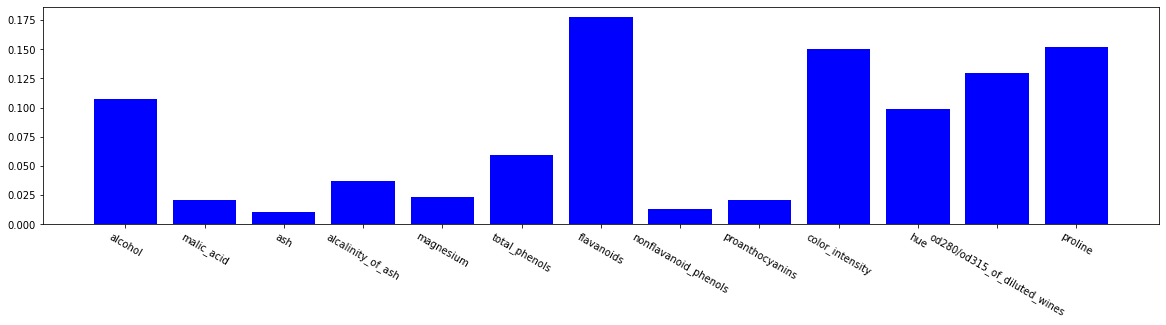

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.bar(wine['feature_names'],  model.feature_importances_ ,color = 'blue' )
plt.xticks(wine['feature_names'], rotation = -30)
plt.show()

In [22]:
import pandas as pd
importance = {'cols' : wine['feature_names']  , 'vals': model.feature_importances_}
pd.DataFrame(importance).sort_values(by='vals', ascending = False)

,cols,vals
6,flavanoids,0.177463
12,proline,0.151722
9,color_intensity,0.149943
11,od280/od315_of_diluted_wines,0.129847
0,alcohol,0.107560
10,hue,0.098648
5,total_phenols,0.058929
3,alcalinity_of_ash,0.036747
4,magnesium,0.023591
1,malic_acid,0.020780
